# Projeto 2 - Ciência dos Dados

Integrantes: 

- Anderson Franco Júnior
- Luiz Miguel Moraes Berredo
- Samuel Jabes Costa Cavalcanti
- Vinícius Rodrigues de Freitas

<div id="indice"></div>

## Índice

- [Visão Geral;](#visao_geral)
- [Análise exploratória;](#analise_explor)





##### Carregando algumas bibliotecas

In [1]:
%matplotlib inline
# A linha acima é necessária para visualizar os gráficos no jupyter notebook

import os
import pandas as pd
# Módulo com funções matemáticas para arrays multidimensionais (matrizes)
import numpy as np
# Módulo com funções de geração de gráficos
import matplotlib.pyplot as plt
# Módulo com funções de cunho estatístico
from scipy import stats
import seaborn as sns
# Função para dividir conjuntos de treino e teste para aplicação do modelo
from sklearn.model_selection import train_test_split

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\samue\OneDrive\Documentos\Insper\2º Semestre\Ciência dos Dados\Projeto 2\23-1a-cd-p2-anderson_samuel_vinicius


**Carregando as bases de dados**

<div id='visao_geral'></div>

# Visão Geral

<img src="https://www.social.go.gov.br/images/2022/cadunico.png" alt="">

##### Objetivo
- Com a base de dados obtida acerca de conhecimentos e práticas financeiras de pessoas cadastradas no CADÚnico, o projeto que apresentaremos tem como objetivo principal aplicar modelos de classificação para compreender e analisar `os fatores que influenciam no endividamento de pessoas cadastradas no CADUnico`, sendo este o tema central deste projeto. O CADUnico (Cadastro Único para Programas Sociais do Governo Federal) é um instrumento que reúne informações socioeconômicas das famílias de baixa renda no Brasil, sendo utilizado como base para a seleção e implementação de políticas públicas.

##### Motivação
- O endividamento é uma questão preocupante e desafiadora que afeta muitas pessoas em diferentes contextos socioeconômicos. No caso específico das famílias cadastradas no CADUnico, é fundamental compreender os fatores que contribuem para esse endividamento, a fim de desenvolver estratégias eficazes para lidar com essa situação.

- Ao entender os fatores que influenciam o endividamento, é possível identificar padrões, correlações e variáveis relevantes que contribuem para o problema.

# Limpando a base de dados

**Lendo a base de dados a visualizando seu conteúdo**

Primeiramente vamos abrir a base de dados e entender as características desta.

In [2]:
responsaveis_df = pd.read_csv('Data/Base_Responsaveis.csv', encoding='latin1', sep=';')
responsaveis_df.head(5)

,ID_DOM,CodIBGE7,CodUF,R01,R02D,R02M,R02A,R03,R04,R05,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,1,...,,,,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,1,...,,,,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,2,...,,,,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,1,...,,,,2,2,2,2,2,2,
4,5,2311801,23,2,18,9,1976,2,2,2,...,,,,2,2,2,2,2,1,1


In [3]:
responsaveis_df.shape

(8827, 482)

In [4]:
nomes_colunas = [x.upper() for x in list(responsaveis_df.columns)]
responsaveis_df.columns = nomes_colunas
nomes_colunas

['ID_DOM',
 'CODIBGE7',
 'CODUF',
 'R01',
 'R02D',
 'R02M',
 'R02A',
 'R03',
 'R04',
 'R05',
 'R05A',
 'R06_01',
 'R07_01',
 'R08_01',
 'R09_01',
 'R06_02',
 'R07_02',
 'R08_02',
 'R09_02',
 'R06_03',
 'R07_03',
 'R08_03',
 'R09_03',
 'R10A',
 'R10B',
 'R11',
 'R12',
 'R17_01',
 'R17_02',
 'R17_03',
 'R17_04',
 'R17_05',
 'R17_06',
 'R17_07',
 'R17_08',
 'R17_09',
 'R18_01',
 'R18_02',
 'R18_03',
 'R19_01',
 'R20_01',
 'R19_02',
 'R20_02',
 'R19_03',
 'R20_03',
 'R19_04',
 'R20_04',
 'R19_05',
 'R20_05',
 'R19_06',
 'R20_06',
 'R19_07',
 'R20_07',
 'R19_08',
 'R20_08',
 'R19_09',
 'R20_09',
 'R19_10',
 'R20_10',
 'R19_11',
 'R20_11',
 'R19_12',
 'R20_12',
 'R19_13',
 'R20_13',
 'R19_14',
 'R20_14',
 'R19_15',
 'R20_15',
 'R19_16',
 'R20_16',
 'R19_17',
 'R20_17',
 'R19_18',
 'R20_18',
 'R19_98',
 'R20_98',
 'R21',
 'R22',
 'R23_01',
 'R23_02',
 'R23_03',
 'R23_04',
 'R23_05',
 'R24',
 'R25',
 'R26_01',
 'R26_02',
 'R26_03',
 'R26_04',
 'R26_05',
 'R27_01',
 'R27_02',
 'R27_03',
 'R27_0

**Manipulando as colunas do DataFrame**

Algumas colunas são referentes à mesma pergunta do questionário, vamos criar um dicionário onde cada chave é referente a uma pergunta e seu valor é uma lista de colunas associadas à pergunta.

In [5]:
col_per_quest = {}
for i in range(len(nomes_colunas)):
    in_car = nomes_colunas[i][0:3]
    if(in_car not in col_per_quest.keys()):
        col_per_quest[in_car] = [nomes_colunas[i]]
    else:
        col_per_quest[in_car].append(nomes_colunas[i])
col_per_quest

{'ID_': ['ID_DOM'],
 'COD': ['CODIBGE7', 'CODUF'],
 'R01': ['R01'],
 'R02': ['R02D', 'R02M', 'R02A'],
 'R03': ['R03'],
 'R04': ['R04'],
 'R05': ['R05', 'R05A'],
 'R06': ['R06_01', 'R06_02', 'R06_03'],
 'R07': ['R07_01', 'R07_02', 'R07_03'],
 'R08': ['R08_01', 'R08_02', 'R08_03'],
 'R09': ['R09_01', 'R09_02', 'R09_03'],
 'R10': ['R10A', 'R10B'],
 'R11': ['R11'],
 'R12': ['R12'],
 'R17': ['R17_01',
  'R17_02',
  'R17_03',
  'R17_04',
  'R17_05',
  'R17_06',
  'R17_07',
  'R17_08',
  'R17_09'],
 'R18': ['R18_01', 'R18_02', 'R18_03'],
 'R19': ['R19_01',
  'R19_02',
  'R19_03',
  'R19_04',
  'R19_05',
  'R19_06',
  'R19_07',
  'R19_08',
  'R19_09',
  'R19_10',
  'R19_11',
  'R19_12',
  'R19_13',
  'R19_14',
  'R19_15',
  'R19_16',
  'R19_17',
  'R19_18',
  'R19_98'],
 'R20': ['R20_01',
  'R20_02',
  'R20_03',
  'R20_04',
  'R20_05',
  'R20_06',
  'R20_07',
  'R20_08',
  'R20_09',
  'R20_10',
  'R20_11',
  'R20_12',
  'R20_13',
  'R20_14',
  'R20_15',
  'R20_16',
  'R20_17',
  'R20_18',
  'R

**Separando os dataframes e os tratando**

Antes de tratarmos de colunas referentes a uma mesma pergunta, para podermos partir para o desenvolvimento dos modelos e aplicação das ferramentas estatísticas, faz-se necessário limpar a base dados uma vez que esta apresenta um certo grau de "caos", digamos assim, com uma quantidade considerável de colunas e muitos valores nulos em diversas variáveis. 

Logo, para começar, vamos:

`Informações demográficas`: separamos em um novo dataframe informações referentes ao indívíduo em si, como gênero, grau de escolaridade e data de nascimento, o que consideramos importantes para a análise. Felizmente, tal conjunto não apresenta anomalias, logo não será necessário filtrar coisa alguma.

_Apêndice_: embora não consideramos aqui as informações de localidade para as informações demográficas (o que consideramos relevante também), mais abaixo elas serão consideradas. Estamos fazendo isso apenas para não haver repetição de colunas no nosso dataframe final (em questão de tratamento). 

In [6]:
col_demografico = ['ID_DOM', 'CODIBGE7', 'CODUF', 'R01', 'R02D', 'R02M', 'R02A', 'R03', 'R04']
info_demografico = responsaveis_df.loc[:, col_demografico]
info_demografico.head(5)

,ID_DOM,CODIBGE7,CODUF,R01,R02D,R02M,R02A,R03,R04
0,1,1101476,11,2,4,2,1977,2,5
1,2,1200385,12,2,6,7,1977,1,3
2,3,2311801,23,2,22,9,1986,2,3
3,4,2311801,23,2,14,9,1983,4,3
4,5,2311801,23,2,18,9,1976,2,2


`Informações monetárias`: notamos que existem algumas variáveis que tratam sobre o recebimento e gasto de dinheiro de cada indivíduo, o que entendemos que é bastante relevante haja vista que essa abordagem permite uma compreensão mais precisa e detalhada dos hábitos financeiros das pessoas, além de identificar possíveis desequilíbrios entre renda e despesas.

In [7]:
col_money = ['R10A', 'R10B', 'R20_01', 'R20_02', 'R20_03', 'R20_04', 'R20_05', 'R20_06', 'R20_07', 'R20_08', 'R20_09', 
             'R20_10', 'R20_11', 'R20_12', 'R20_13', 'R20_14', 'R20_15', 'R20_16', 'R20_17','R20_18', 'R20_98', 'R22', 'R25',
             'R39', 'R82']
info_money = responsaveis_df.loc[:, col_money]
info_money = info_money.astype(str)
info_money.head(5)

,R10A,R10B,R20_01,R20_02,R20_03,R20_04,R20_05,R20_06,R20_07,R20_08,...,R20_14,R20_15,R20_16,R20_17,R20_18,R20_98,R22,R25,R39,R82
0,545,"9999,97",92,,,,,,,,...,,,,,,,,,"9999,97",14
1,545,"9999,97",112,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
2,,,102,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
3,545,"9999,97",90,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
4,,,134,,,,,,,,...,,,,,,,,,"9999,97",6


Note que, desta vez, possuímos uma vasta quantidade de valores nulos em diferentes colunas. Para não trabalharmos com valores do tipo, decidimos que é interessante substituí-los pelo valor 0, uma vez que estamos tratando de quantidade monetária, seja esta quantidade um recebimento ou um gasto.

In [8]:
for column in list(info_money):
    info_money.loc[[(not x.isnumeric()) for x in info_money[column]], column] = '0'

info_money.head(5)

,R10A,R10B,R20_01,R20_02,R20_03,R20_04,R20_05,R20_06,R20_07,R20_08,...,R20_14,R20_15,R20_16,R20_17,R20_18,R20_98,R22,R25,R39,R82
0,545,0,92,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1,545,0,112,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,102,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,545,0,90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


`Informações sobre tempo`: uma vez que o tempo pode ser considerada como uma variável quantitativa, mas com um conceito mais abstrato em quesito de ser algo palpável como quantidade, aqui separamos-a e entendemos que quando as pessoas dizem que não sabem ou não tem noção do tempo, ou até mesmo não responderam, decidimos que substituir por _0_ mostra-se mais viável, até mesmo em quesito de preenchimento.

In [9]:
col_time = ['R37H', 'R37M', 'R38H', 'R38M', 'R08_01', 'R08_02', 'R08_03']
info_time = responsaveis_df.loc[:, col_time]
info_time = info_time.astype(str)

In [10]:
# Anulando as linhas 99 e 97 da pergunta 37
linhas_99_97_37 = info_time[(info_time['R37H'] == '99') | (info_time['R37H'] == '97') | (info_time['R37H'] == ' ')].index

info_time.loc[linhas_99_97_37, ['R37H','R37M']] = '0'

# Anulando as linhas 99 e 97 da pergunta 38
linhas_99_97_38 = info_time[(info_time['R38H'] == '99') | (info_time['R38H'] == '97') | (info_time['R38H'] == ' ')].index

info_time.loc[linhas_99_97_38, ['R38H','R38M']] = '0'

# Anulando quando o responsável não informa a quantidade de horas trabalhada:
horas_trab = ['R08_01', 'R08_02', 'R08_03']
for column in horas_trab:
    info_time.loc[[(not str(x).isnumeric()) for x in info_time[column]], column] = '0'
    
info_time

,R37H,R37M,R38H,R38M,R08_01,R08_02,R08_03
0,0,20,0,5,36,0,0
1,0,20,0,10,40,0,0
2,6,0,2,0,0,0,0
3,0,30,0,15,40,0,0
4,1,0,0,30,0,0,0
...,...,...,...,...,...,...,...
8822,2,30,0,30,0,0,0
8823,0,15,0,5,0,0,0
8824,0,30,0,5,0,0,0
8825,0,40,0,15,20,0,0


`Informações categóricas`: agora, por fim, o que nos sobra (em maioria) são as nossas variáveis qualitativas que se mostram mais necessitadas de uma limpeza mais adequada. De início, selecionamos todas as outras colunas que não foram selecionadas/tratadas antes.

In [11]:
nao_cat = ['ID_DOM', 'CODIBGE7', 'CODUF', 'R01', 'R02D', 'R02M', 'R02A', 'R03', 'R04', 'R10A', 'R10B', 'R20_01', 'R20_02',
           'R20_03', 'R20_04', 'R20_05', 'R20_06', 'R20_07', 'R20_08', 'R20_09', 'R20_10', 'R20_11', 'R20_12', 'R20_13',
           'R20_14', 'R20_15', 'R20_16', 'R20_17', 'R20_18', 'R20_98', 'R22', 'R25', 'R39', 'R82', 'R37H', 'R37M', 'R38H', 
           'R38M', 'R08_01', 'R08_02', 'R08_03']
categoricas = []
for list_column in col_per_quest.values():
    for column in list_column:
        if column not in nao_cat:
            categoricas.append(column)
info_categoricas = responsaveis_df.loc[:, categoricas]
info_categoricas = info_categoricas.astype(str)

Agora, voltando a tratar dessas colunas que são referentes à mesma pergunta do questionário, temos que algumas correspondem a perguntas que possuem subdivisões - como itens - e que geram várias respostas. Numa leitura do questionário correspondente, identificamos as seguintes perguntas como tendo essas características:

- Pergunta 6
- Pergunta 7
- Pergunta 8
- Pergunta 9
- Pergunta 10
- Pergunta 17
- Pergunta 18
- Pergunta 19
- Pergunta 20
- Pergunta 30
- Pergunta 44
- Pergunta 54
- Pergunta 55
- Pergunta 76
- Pergunta 94

In [12]:
frag_quest = ['R06', 'R07', 'R08', 'R09', 'R10', 'R17', 'R18', 'R19', 'R20', 'R30', 'R44', 'R54', 'R55', 'R76', 'R94']
for column in categoricas:
    num_column = column[0:3]
    if num_column in frag_quest:
        info_categoricas.loc[[(not str(x).isnumeric()) for x in info_categoricas[column]], column] = '99'
        
info_categoricas.head(5)

,R05,R05A,R06_01,R06_02,R06_03,R07_01,R07_02,R07_03,R09_01,R09_02,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1,4,99,99,5,99,99,4,99,...,,,,2,2,2,2,2,1,2
1,1,1,2,99,99,4,99,99,4,99,...,,,,2,2,2,2,2,1,1
2,2,,99,99,99,99,99,99,99,99,...,,,,2,2,2,2,2,1,1
3,1,1,1,99,99,1,99,99,4,99,...,,,,2,2,2,2,2,2,
4,2,,99,99,99,99,99,99,99,99,...,,,,2,2,2,2,2,1,1


As demais são referentes às respostas de uma mesma pergunta, ou seja, cada coluna é referente a uma possível resposta de uma mesma pergunta. Neste caso,  há vários valores vazios quando o respondente não assinalou aquela alternativa e o valor da resposta quando o respondente assinalou.

Como o nome da coluna já contém o número da resposta, vamos trocar os vazios por `0` e os valores de resposta por `1`.


In [13]:
for column in categoricas:
    num_column = column[0:3]
    if num_column not in frag_quest and len(col_per_quest[num_column])>1:
        info_categoricas.loc[[(str(x).isnumeric()) for x in info_categoricas[column]], column] = '1'
        info_categoricas.loc[[(not str(x).isnumeric()) for x in info_categoricas[column]], column] = '0'
        
info_categoricas.head(5)

,R05,R05A,R06_01,R06_02,R06_03,R07_01,R07_02,R07_03,R09_01,R09_02,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1,4,99,99,5,99,99,4,99,...,0,0,0,2,2,2,2,2,1,2
1,1,1,2,99,99,4,99,99,4,99,...,0,0,0,2,2,2,2,2,1,1
2,1,0,99,99,99,99,99,99,99,99,...,0,0,0,2,2,2,2,2,1,1
3,1,1,1,99,99,1,99,99,4,99,...,0,0,0,2,2,2,2,2,2,
4,1,0,99,99,99,99,99,99,99,99,...,0,0,0,2,2,2,2,2,1,1


**Ainda tratando valores nulos**

Ainda há valores nulos em nosso DataFrame, em posições que podemos não conhecer e nem saber a razão pela qual o valor é nulo. Por esse motivo, vamos usar a função `value_counts` para visualizar quais colunas possuem valores nulos e então ver as perguntas associadas para saber como podemos tratá-las.

In [14]:
for column in list(info_categoricas.columns):
    if False in [str(x).isdigit() for x in list(info_categoricas[column])]:
        print(info_categoricas[column].value_counts())
        print("---------------------------------")

1     7649
       805
2      323
99      50
Name: R35, dtype: int64
---------------------------------
1     3544
5     1787
2      809
       717
99     567
8      555
6      427
4      178
3      103
9       40
7       39
11      31
12      25
10       5
Name: R36, dtype: int64
---------------------------------
2     5519
      2632
1      571
99     105
Name: R57, dtype: int64
---------------------------------
2     6755
      1180
1      765
99     127
Name: R59, dtype: int64
---------------------------------
2     6317
      1379
1      966
99     165
Name: R62, dtype: int64
---------------------------------
     7951
1     561
3     202
2     113
Name: R63, dtype: int64
---------------------------------
2     3274
1     2791
      2692
99      70
Name: R66, dtype: int64
---------------------------------
1    8213
      593
2      21
Name: R79, dtype: int64
---------------------------------
2     6852
1     1294
       614
99      67
Name: R83, dtype: int64
------------------------

A questão `98` pergunta "A entrevista do cônjugue foi realizada?" e é condicionada à pergunta `97` que diz "O responsável possui cônjugue morando no mesmo domicílio?". Como, para essa pergunta, não faz diferença técnica a entrevista não existir por o morador não ter um cônjugue ou a entrevista não ter sida realizada, substituiremos todos os valores por `2` que equivale à resposta "Não".

In [15]:
info_categoricas.loc[[(not x.isnumeric()) for x in info_categoricas['R98']], 'R98'] = '2'
info_categoricas['R98'].value_counts()

2    4810
1    4017
Name: R98, dtype: int64

Similarmente à questão 98, a questão `79` traz a pergunta "É o seu nome que está escrito no cartão do Bolsa Família?" condicionada à questão `78`. Novamente substituiremos pelo valor `2` por razões similares.

In [16]:
info_categoricas.loc[[(not x.isnumeric()) for x in info_categoricas['R79']], 'R79'] = '2'
info_categoricas['R79'].value_counts()

1    8213
2     614
Name: R79, dtype: int64

Para as demais perguntas, podemos substituir os valores vazios por `99` sem perda de informações.

In [17]:
preenche99 = ['R35', 'R36', 'R57', 'R59', 'R62', 'R63', 'R66', 'R83', 'R86', 'R88', 'R90', 'R92']

for coluna in preenche99:
    info_categoricas.loc[[(not x.isdigit()) for x in info_categoricas[coluna]], coluna] = '99'
    
info_categoricas.loc[:, preenche99].head(10)

,R35,R36,R57,R59,R62,R63,R66,R83,R86,R88,R90,R92
0,1,1,99,2,2,99,99,2,1,2,2,3
1,1,8,99,2,2,99,2,2,1,2,2,3
2,1,1,2,2,2,99,2,2,1,2,2,3
3,1,1,2,2,2,99,2,2,2,2,2,3
4,1,99,2,2,2,99,2,2,1,2,2,3
5,1,5,2,2,2,99,2,1,1,2,2,1
6,2,99,99,2,2,99,99,2,1,2,2,2
7,2,5,2,2,2,99,2,99,99,99,99,99
8,2,99,99,2,2,99,2,1,1,2,2,3
9,2,99,99,2,2,99,2,99,99,99,99,99


**Dataframe tratado**

Para obter novamente uma visão completa e integrada dos dados, é necessário reunir novamente as informações dos dataframes divididos, realizando a concatenação para formar um único dataframe consolidado, fornecendo insights mais completos e facilitando a identificação de padrões e relações entre as variáveis envolvidas.

In [18]:
responsaveis_df = pd.concat([info_demografico, info_money, info_time, info_categoricas], axis=1)
responsaveis_df.head(10)

,ID_DOM,CODIBGE7,CODUF,R01,R02D,R02M,R02A,R03,R04,R10A,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,545,...,0,0,0,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,545,...,0,0,0,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,0,...,0,0,0,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,545,...,0,0,0,2,2,2,2,2,2,2
4,5,2311801,23,2,18,9,1976,2,2,0,...,0,0,0,2,2,2,2,2,1,1
5,6,1302603,13,2,8,4,1965,3,1,50,...,0,0,0,2,2,2,2,2,2,2
6,7,3118809,31,2,30,5,1964,2,1,0,...,0,0,0,2,2,2,2,2,1,1
7,8,3118809,31,2,19,4,1946,4,2,100,...,0,0,0,99,99,99,99,99,2,2
8,9,3118809,31,1,31,7,1965,2,1,300,...,0,0,0,2,2,2,2,2,1,1
9,10,3118809,31,2,1,1,1950,5,1,150,...,0,0,0,99,99,99,99,99,2,2


**Preservando os tipos das colunas**

Após reconstruir o DataFrame, os tipos das colunas foram alterados. Vamos corrigir este problema.

In [19]:
for coluna in list(responsaveis_df.columns):
    if coluna in categoricas:
        responsaveis_df[coluna] = (responsaveis_df[coluna].astype('str')).astype('category')
    elif coluna in list(info_money.columns):
        responsaveis_df[coluna] = responsaveis_df[coluna].astype('float')
    elif coluna in list(info_time.columns):
        responsaveis_df[coluna] = responsaveis_df[coluna].astype('int64')

<div id='analise_explor'></div>

# Análise Exploratória

## Analisando a variável target

Nossa target será a coluna `R52`, que contém as respostas da pergunta 52 cujo enunciado é: 

_"Alguma vez o(a) sr(a) ficou com o nome sujo na praça, ou seja, teve seu nome registrado no SERASA ou Serviço de Proteção ao Crédito?"_ 

E permite as seguintes respostas:

- 1 - Sim, mas não está mais
- 2 - Sim, ainda está
- 3 - Não
- 99 - Não sabe

Além disso, qualquer resposta que não seja "3 - Não", condiciona o respondente a responder a pergunta 53, que está representada pela coluna `R53`.

In [20]:
responsaveis_df['R52'].value_counts()

3     4718
2     2520
1     1470
99     119
Name: R52, dtype: int64

O valor `99` representa a resposta `Não sabe`, que não é uma resposta muito frutífera para a nossa proposta de entender os fatores que levam ao endividamento de usuários do CadÚnico. Além disso, o número de valores `99` é desproporcionalmente menor que os demais, o que significa que seria muito provavelmente ignorado pelos modelos de categorização.

Desta forma, optamos por remover as linhas que contém a resposta `99` da nossa base de dados.

In [21]:
responsaveis_df = responsaveis_df[responsaveis_df['R52'] != '99']
responsaveis_df['R52'] = responsaveis_df['R52'].cat.remove_categories('99')
responsaveis_df['R52'].value_counts()

3    4718
2    2520
1    1470
Name: R52, dtype: int64

Melhorando os rótulos...

In [22]:
responsaveis_df['R52'].cat.categories = ['Não', 'Sim, ainda está', 'Sim, mas não está mais']

Em relação à pergunta `53`, que está condicionada à pergunta 52, vamos analisar como suas respostas estão entrelaçadas.

## Analisando informações demográficas

As primeiras perguntas do questionário, e consequentemente as primeiras colunas do DataFrame, são referentes a perguntas demográficas ou dados da pesquisa. Vamos analisar esses parâmetros separadamente.

**ID_DOM**

A coluna `ID_DOM` parece armazenar a numeração do questionário relativo aos demais. Desta forma, se comporta como um índice, o que não é frutífero para nossa análise.

In [23]:
responsaveis_df.ID_DOM.value_counts()

1       1
5890    1
5884    1
5885    1
5886    1
       ..
2941    1
2940    1
2939    1
2938    1
8827    1
Name: ID_DOM, Length: 8708, dtype: int64

Portanto, removeremos a coluna `ID_DOM` da base de dados.

In [24]:
responsaveis_df.drop('ID_DOM', axis='columns', inplace=True)

**CODUF**

A coluna `CODUF` se refere ao código do estado no sistema do IBGE. É um parâmetro categórico e pode apresentar uma relevância para a compreensão do perfil geográfico dos respondentes e também para entender como o fator endividamento pode estar atrelado às regiões.

In [25]:
responsaveis_df.CODUF.dtypes

dtype('int64')

In [26]:
estado_UF = {11:'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16:'Amapá', 17:'Tocantins', 21:'Maranhão', 
             22:'Piauí', 23:'Ceará', 24:'Rio Grande do Norte', 25: 'Paraíba', 26:'Pernambuco', 27:'Alagoas', 28:'Sergipe', 
             29:'Bahia', 31:'Minas Gerais', 32:'Espírito Santo', 33:'Rio de Janeiro', 35:'São Paulo', 41:'Paraná', 
             42:'Santa Catarina', 43:'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51:'Mato Grosso', 52:'Goiás',
             53:'Distrito Federal'}

responsaveis_df.CODUF = responsaveis_df.CODUF.map(estado_UF)
responsaveis_df.CODUF = responsaveis_df.CODUF.astype('category')

In [27]:
responsaveis_df.CODUF.value_counts().to_frame()

,CODUF
Goiás,1018
Paraná,899
Pará,868
São Paulo,793
Rio Grande do Sul,528
Bahia,468
Minas Gerais,457
Mato Grosso,436
Pernambuco,357
Amazonas,327


Podemos, ainda, analisar o endividamento por localização geográfica dos respondentes.

In [28]:
endividamento_por_estado = pd.crosstab(responsaveis_df.CODUF, responsaveis_df.R52, normalize='index').round(3)*100
endividamento_por_estado

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Acre,15.2,10.9,73.9
Alagoas,7.5,15.0,77.5
Amapá,24.2,20.9,54.9
Amazonas,12.5,29.4,58.1
Bahia,16.5,14.1,69.4
Ceará,13.6,22.2,64.2
Distrito Federal,23.0,48.3,28.6
Espírito Santo,22.3,21.8,55.9
Goiás,23.2,26.8,50.0


Note que, o percentual de endividamento assim como a continuidade da dívida muda de acordo com o Estado.

Visualizando o endividamento em si, pelos 5 estados com menor endividamento e os 5 estados com maior endividamento:

In [29]:
endividamento_por_estado.sort_values(by='Não', ascending=False).head(5)

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Roraima,28.8,10.2,61.0
Tocantins,25.3,28.7,46.0
Mato Grosso do Sul,24.6,32.8,42.7
Amapá,24.2,20.9,54.9
Goiás,23.2,26.8,50.0


In [30]:
endividamento_por_estado.sort_values(by='Não', ascending=True).head(5)

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Sergipe,0.0,23.3,76.7
Paraíba,3.4,17.2,79.3
Rio Grande do Norte,5.0,25.0,70.0
Alagoas,7.5,15.0,77.5
Maranhão,11.4,7.2,81.4


Visualizando a continuidade, através dos 5 estados que mais têm pessoas em situação atual de endividamento e os 5 estados que têm mais pessoas que saíram da situação de endividamento:

In [31]:
endividamento_por_estado.sort_values(by='Sim, ainda está', ascending=False).head(5)

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Distrito Federal,23.0,48.3,28.6
Rio de Janeiro,20.1,46.5,33.5
São Paulo,18.9,43.8,37.3
Santa Catarina,14.9,42.3,42.8
Rio Grande do Sul,20.1,40.7,39.2


In [32]:
endividamento_por_estado.sort_values(by='Sim, mas não está mais', ascending=False).head(5)

R52,Não,"Sim, ainda está","Sim, mas não está mais"
CODUF,,,
Maranhão,11.4,7.2,81.4
Paraíba,3.4,17.2,79.3
Alagoas,7.5,15.0,77.5
Sergipe,0.0,23.3,76.7
Acre,15.2,10.9,73.9


Interessante notar que os estados que aparecem com maior continuidade do endividamento são do Sudeste e Sul, enquanto os que tiveram a menor continuidade são estados do Nordeste e Norte.

Isso indica que há boas chances de a localização geográfica ser um fator relevante para determinar quem está com o nome no SERASA ou não.

**R01**

A questão `R01` diz respeito ao sexo do respondente, tendo como opções "(1) Masculino" e "(2) Feminino". Iremos avaliar a distribuição dos respondentes por sexo e também como isso se relaciona com o perfil de endividamento.

In [33]:
responsaveis_df.R01.dtypes

dtype('int64')

In [34]:
responsaveis_df.R01 = responsaveis_df.R01.map({1:'Masculino', 2:'Feminino'})
responsaveis_df = responsaveis_df.astype('category')

In [35]:
valores_sexo = responsaveis_df.R01.value_counts()
valores_sexo.to_frame()

,R01
Feminino,8042
Masculino,666


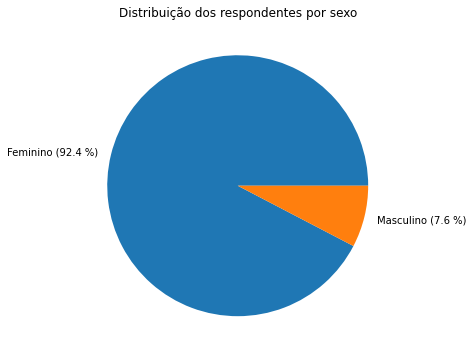

In [36]:
plt.figure(figsize=(10,6))
plt.pie(valores_sexo, labels=[f'Feminino ({valores_sexo[0]*100/sum(valores_sexo):.1f} %)', f'Masculino ({valores_sexo[1]*100/sum(valores_sexo):.1f} %)'])
plt.title('Distribuição dos respondentes por sexo')
plt.show()

Analisando em termos da nossa variável target...

In [37]:
serasa_x_sexo = pd.crosstab(responsaveis_df.R01, responsaveis_df.R52, normalize='index').round(3)*100
serasa_x_sexo

R52,Não,"Sim, ainda está","Sim, mas não está mais"
R01,,,
Feminino,16.7,29.4,53.9
Masculino,18.9,23.9,57.2


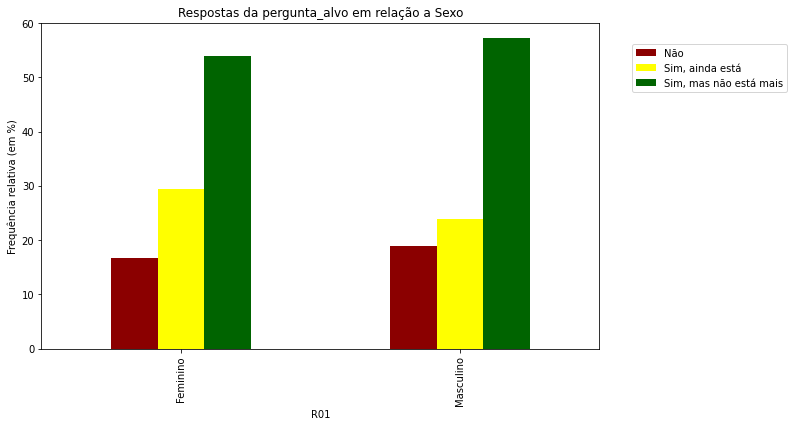

In [38]:
cores = ['darkred', 'yellow','darkgreen']

serasa_x_sexo.plot.bar(color = cores, figsize=(10, 6))
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Respostas da pergunta_alvo em relação a Sexo')
plt.show()

Percebemos que a distribuição das respostas da `R52` praticamente não varia de acordo com as respostas da `R01`, então sexo deve ser um parâmetro pouco relevante.

**R02**

As colunas com início `R02` dizem respeito à data de nascimento do respondente, separada em dia (`R02D`), mês (`R02M`) e ano (`R02A`). Podemos, com isso, ter alguma noção sobre como a idade pode influenciar na nossa variável target.

Analisando a coluna `R02D`, relativa ao dia:

In [39]:
responsaveis_df.R02D = responsaveis_df.R02D.astype('int64')

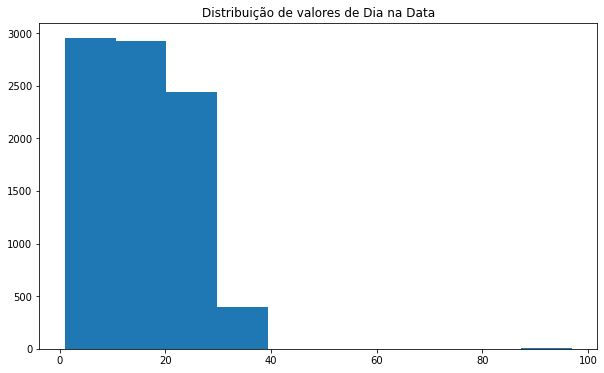

In [40]:
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.R02D)
plt.title('Distribuição de valores de Dia na Data')
plt.show()

Removendo outliers...

In [41]:
responsaveis_df = responsaveis_df[responsaveis_df['R02D'] <= 31]
responsaveis_df.shape

(8704, 481)

Analisando a distribuição dos dias no geral e relativo à target:

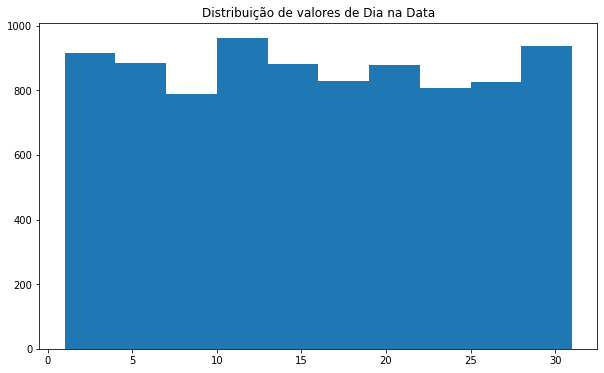

In [42]:
BINS = np.linspace(1, 31, 31)
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.R02D)
plt.title('Distribuição de valores de Dia na Data')
plt.show()

In [43]:
responsaveis_df.groupby('R52').R02D.describe()

,count,mean,std,min,25%,50%,75%,max
R52,,,,,,,,
Não,1469.0,15.345133,8.853793,1.0,8.0,15.0,23.0,31.0
"Sim, ainda está",2520.0,15.405952,8.786600,1.0,8.0,15.0,23.0,31.0
"Sim, mas não está mais",4715.0,15.479321,8.712671,1.0,8.0,15.0,23.0,31.0


Desta forma, vemos que a distribuição dos dias é aleatória, e portanto podemos considerar como irrelevante para análise e até mesmo para o DataFrame dentro do nosso objetivo de análise.

In [44]:
responsaveis_df.drop('R02D', axis='columns', inplace=True)

Agora para a coluna `R02M`, relativa ao mês...

In [45]:
responsaveis_df.R02M = responsaveis_df.R02M.astype('int64')

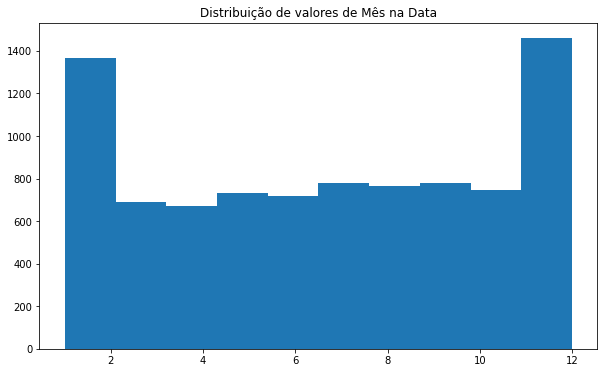

In [46]:
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.R02M)
plt.title('Distribuição de valores de Mês na Data')
plt.show()

In [47]:
responsaveis_df.groupby('R52').R02M.describe()

,count,mean,std,min,25%,50%,75%,max
R52,,,,,,,,
Não,1469.0,6.669163,3.440543,1.0,4.0,7.0,10.0,12.0
"Sim, ainda está",2520.0,6.542857,3.445450,1.0,4.0,7.0,9.0,12.0
"Sim, mas não está mais",4715.0,6.634571,3.400796,1.0,4.0,7.0,10.0,12.0


Novamente um comportamento randômico e que não se altera de acordo com as categorias da variável target, o que mostra que o mês também é um parâmetro desinteressante.

In [ ]:
responsaveis_df.drop('R02M', axis='columns')

Para a coluna `R02A`, relativa ao ano...

In [48]:
responsaveis_df.R02A = responsaveis_df.R02A.astype('int64')

In [49]:
responsaveis_df.R02A.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
R02A,8704.0,1976.144646,192.603831,1910.0,1965.0,1973.0,1979.0,9997.0


<Axes: >

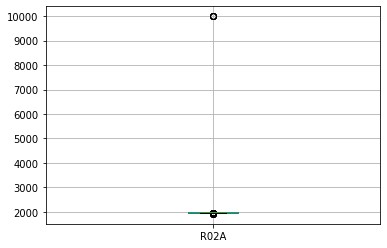

In [50]:
responsaveis_df.boxplot(column='R02A')

Removendo os outliers:

In [51]:
responsaveis_df = responsaveis_df[responsaveis_df['R02A'] <= 2011]

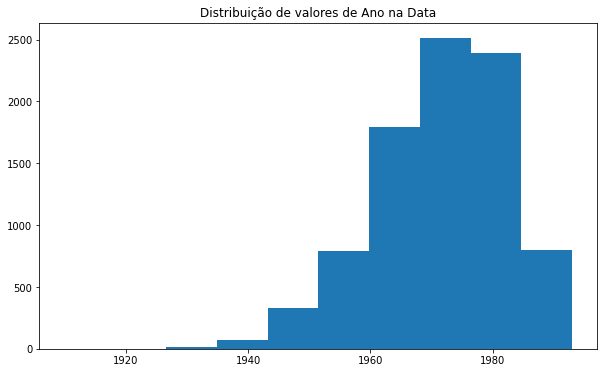

In [52]:
plt.figure(figsize=(10,6))
plt.hist(responsaveis_df.R02A)
plt.title('Distribuição de valores de Ano na Data')
plt.show()

In [53]:
responsaveis_df.groupby('R52').R02A.describe()

,count,mean,std,min,25%,50%,75%,max
R52,,,,,,,,
Não,1466.0,1971.427694,10.208570,1936.0,1965.0,1973.0,1979.0,1991.0
"Sim, ainda está",2520.0,1973.340079,9.431931,1931.0,1968.0,1975.0,1980.0,1992.0
"Sim, mas não está mais",4713.0,1970.602164,11.321332,1910.0,1963.0,1972.0,1979.0,1993.0


Por fim, a coluna `R02A` mostrou um leve desvio de valores entre as pessoas que responderam "Sim, ainda está" e "Sim, mas não está mais" na `R52`, mas nada conclusivo. É improvável que a idade seja um fator determinante para o comportamento de nossa target, mas pode exercer influência.

In [ ]:
responsaveis_df.drop('R02A', axis='columns')

**R03**

A coluna `R03` se refere às respostas da pergunta "Qual o seu Estado Civil?" que admite as respostas:

- (1) Casado (a) 
- (2) Mora junto com companheiro (a)/ amasiado (a)/ União Consensual 
- (3) Divorciado (a) / desquitado (a) ou separado (a) judicialmente 
- (4) Solteiro (a) 
- (5) Viúvo (a)

Vamos analisar seu comportamento geral e em torno da variável target.

In [54]:
responsaveis_df.R03.dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

In [55]:
responsaveis_df.R03.cat.categories = ['Casado', 'União Consensual', 'Divorciado', 'Solteiro', 'Viúvo']
responsaveis_df.R03.value_counts()

Casado              3020
União Consensual    2477
Solteiro            1878
Divorciado          1000
Viúvo                324
Name: R03, dtype: int64

In [56]:
serasa_x_ec = pd.crosstab(responsaveis_df.R03, responsaveis_df.R52, normalize='index').round(3)*100
serasa_x_ec

R52,Não,"Sim, ainda está","Sim, mas não está mais"
R03,,,
Casado,15.4,21.7,62.9
União Consensual,16.8,29.4,53.7
Divorciado,18.7,34.1,47.2
Solteiro,18.6,37.8,43.6
Viúvo,14.8,26.2,59.0


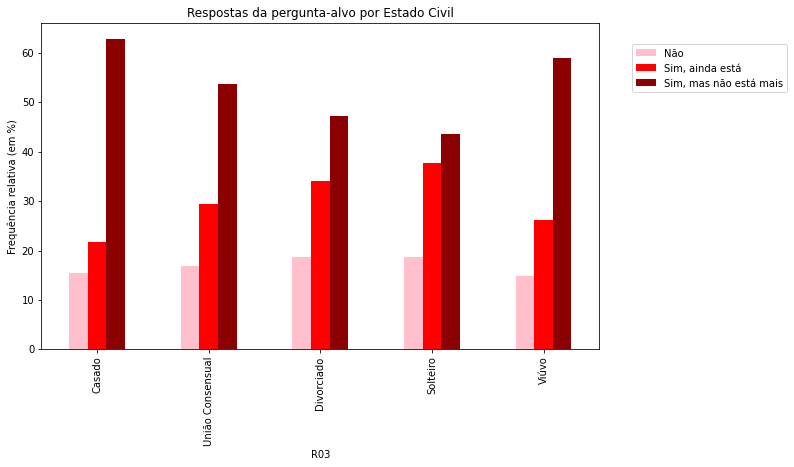

In [57]:
cores = ['pink', 'red','darkred']

serasa_x_ec.plot.bar(color = cores, figsize=(10, 6))
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Respostas da pergunta-alvo por Estado Civil')
plt.show()

In [58]:
separate_R03 = pd.get_dummies(responsaveis_df.R03)
separate_R03.head(5)

,Casado,União Consensual,Divorciado,Solteiro,Viúvo
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [59]:
responsaveis_df.drop('R03', axis='columns', inplace=True)
responsaveis_df = pd.concat([responsaveis_df, separate_R03], axis=1)

['CODIBGE7',
 'CODUF',
 'R01',
 'R02D',
 'R02M',
 'R02A',
 'R04',
 'R10A',
 'R10B',
 'R20_01',
 'R20_02',
 'R20_03',
 'R20_04',
 'R20_05',
 'R20_06',
 'R20_07',
 'R20_08',
 'R20_09',
 'R20_10',
 'R20_11',
 'R20_12',
 'R20_13',
 'R20_14',
 'R20_15',
 'R20_16',
 'R20_17',
 'R20_18',
 'R20_98',
 'R22',
 'R25',
 'R39',
 'R82',
 'R37H',
 'R37M',
 'R38H',
 'R38M',
 'R08_01',
 'R08_02',
 'R08_03',
 'R05',
 'R05A',
 'R06_01',
 'R06_02',
 'R06_03',
 'R07_01',
 'R07_02',
 'R07_03',
 'R09_01',
 'R09_02',
 'R09_03',
 'R11',
 'R12',
 'R17_01',
 'R17_02',
 'R17_03',
 'R17_04',
 'R17_05',
 'R17_06',
 'R17_07',
 'R17_08',
 'R17_09',
 'R18_01',
 'R18_02',
 'R18_03',
 'R19_01',
 'R19_02',
 'R19_03',
 'R19_04',
 'R19_05',
 'R19_06',
 'R19_07',
 'R19_08',
 'R19_09',
 'R19_10',
 'R19_11',
 'R19_12',
 'R19_13',
 'R19_14',
 'R19_15',
 'R19_16',
 'R19_17',
 'R19_18',
 'R19_98',
 'R21',
 'R23_01',
 'R23_02',
 'R23_03',
 'R23_04',
 'R23_05',
 'R24',
 'R26_01',
 'R26_02',
 'R26_03',
 'R26_04',
 'R26_05',
 'R27_0

**R04**

A coluna `R04` diz respeito ao grau de escolaridade do respondente e admite os seguintes valores:

- (1) Nunca frequentou escola/ Analfabeto 
- (2) Até 4ª série - Ensino fundamental I 
- (3) De 5ª a 8ª série - Ensino fundamental II 
- (4) Segundo Grau, Ensino médio 
- (5) Superior

Vamos analisar seu comportamento geral e em torno da variável target.

In [61]:
responsaveis_df.R04.dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

In [62]:
responsaveis_df.R04.cat.categories = ['Analfabeto', 'Fundamental I', 'Fundamental II', 'Ensino Médio', 'Ensino Superior']
responsaveis_df.R04.value_counts()

Fundamental II     3031
Fundamental I      2881
Ensino Médio       1848
Analfabeto          848
Ensino Superior      91
Name: R04, dtype: int64

In [63]:
serasa_x_esc = pd.crosstab(responsaveis_df.R04, responsaveis_df.R52, normalize='index').round(3)*100
serasa_x_esc

R52,Não,"Sim, ainda está","Sim, mas não está mais"
R04,,,
Analfabeto,9.3,12.4,78.3
Fundamental I,13.6,22.8,63.6
Fundamental II,19.5,35.8,44.7
Ensino Médio,20.6,35.3,44.1
Ensino Superior,23.1,23.1,53.8


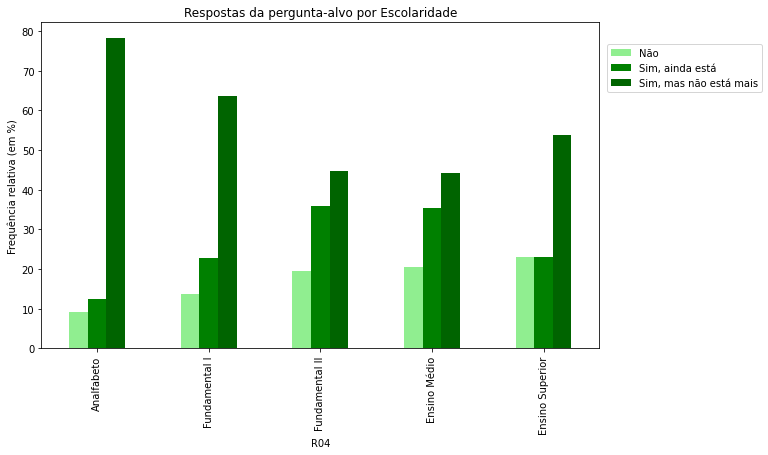

In [64]:
cores = ['lightgreen', 'green','darkgreen']

serasa_x_esc.plot.bar(color = cores, figsize=(10, 6))
plt.ylabel('Frequência relativa (em %)')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.3, 0.95)); # Coloca legenda para fora da janela gráfica
plt.title('Respostas da pergunta-alvo por Escolaridade')
plt.show()

Observamos que as pessoas com escolaridade igual ou superior ao ensino fundamental II têm menor chance de endividamento do que as pessoas com escolaridade inferior. Além disso, as pessoas com menor grau de escolaridade não parecem permanecer com o nome no SERASA por muito tempo, já que têm uma porcentagem muito maior de respostas com valor "Sim, mas não está mais".

Desta forma, a pergunta `R04` indica ser relevante para prever quem tem ou já teve o nome no SERASA ou não.

In [65]:
separate_R04 = pd.get_dummies(responsaveis_df.R04)
separate_R04.head(5)

,Analfabeto,Fundamental I,Fundamental II,Ensino Médio,Ensino Superior
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [66]:
responsaveis_df.drop('R04', axis='columns', inplace=True)
responsaveis_df = pd.concat([responsaveis_df, separate_R04], axis=1)

## Estabelecendo relevância

Ainda possuímos um número considerável de colunas e precisamos reduzir essa grande dimensionalidade. Logo, com o intuito de entender algumas associações de determinadas variáveis em relação ao nosso target, poderemos separar alguns blocos de perguntas que tratam de um mesmo assunto (analisando pelo questionário) e aplicar o `Teste do Chi Quadrado`, sendo capaz de observar as correlações que algumas variáveis (qualitativas) tem com o target.

De primeira mão, vamos analisar plotar a correlação a partir das perguntas iniciais até finais.

In [39]:
# Primeiramente, vamos importar a funcionalidade necessária para a aplicação
from dython.nominal import associations

In [40]:
list(responsaveis_df.columns) # para enxergar melhor qual o intervalo de perguntas que podemos selecionar para a imagem do Chi Quadrado não ficar deveras poluída

['CODIBGE7',
 'CODUF',
 'R01',
 'R02D',
 'R02M',
 'R02A',
 'R03',
 'R04',
 'R10A',
 'R10B',
 'R20_01',
 'R20_02',
 'R20_03',
 'R20_04',
 'R20_05',
 'R20_06',
 'R20_07',
 'R20_08',
 'R20_09',
 'R20_10',
 'R20_11',
 'R20_12',
 'R20_13',
 'R20_14',
 'R20_15',
 'R20_16',
 'R20_17',
 'R20_18',
 'R20_98',
 'R22',
 'R25',
 'R39',
 'R82',
 'R37H',
 'R37M',
 'R38H',
 'R38M',
 'R08_01',
 'R08_02',
 'R08_03',
 'R05',
 'R05A',
 'R06_01',
 'R06_02',
 'R06_03',
 'R07_01',
 'R07_02',
 'R07_03',
 'R09_01',
 'R09_02',
 'R09_03',
 'R11',
 'R12',
 'R17_01',
 'R17_02',
 'R17_03',
 'R17_04',
 'R17_05',
 'R17_06',
 'R17_07',
 'R17_08',
 'R17_09',
 'R18_01',
 'R18_02',
 'R18_03',
 'R19_01',
 'R19_02',
 'R19_03',
 'R19_04',
 'R19_05',
 'R19_06',
 'R19_07',
 'R19_08',
 'R19_09',
 'R19_10',
 'R19_11',
 'R19_12',
 'R19_13',
 'R19_14',
 'R19_15',
 'R19_16',
 'R19_17',
 'R19_18',
 'R19_98',
 'R21',
 'R23_01',
 'R23_02',
 'R23_03',
 'R23_04',
 'R23_05',
 'R24',
 'R26_01',
 'R26_02',
 'R26_03',
 'R26_04',
 'R26_05',

Colunas _5_ a _9_

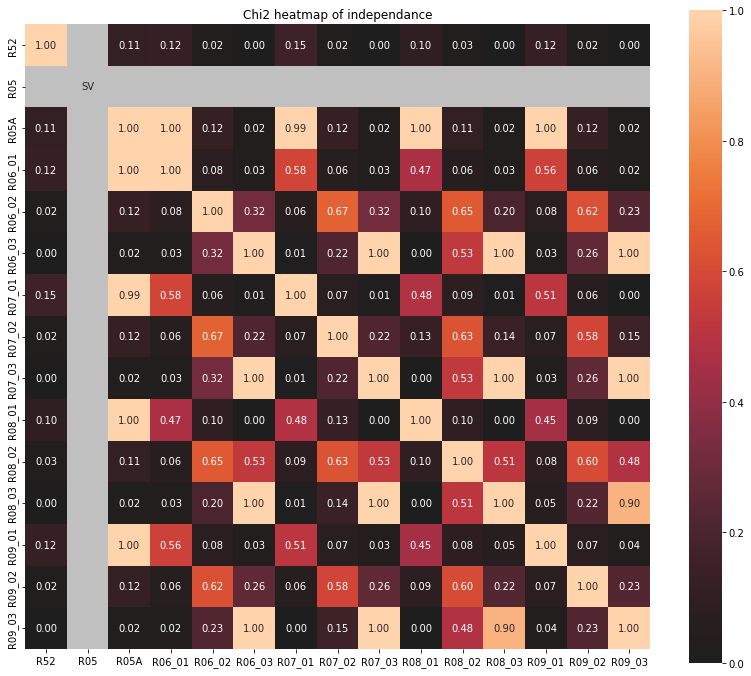

In [41]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 5
while i <= 9:
    aux = 'R0' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _11_ a _12_

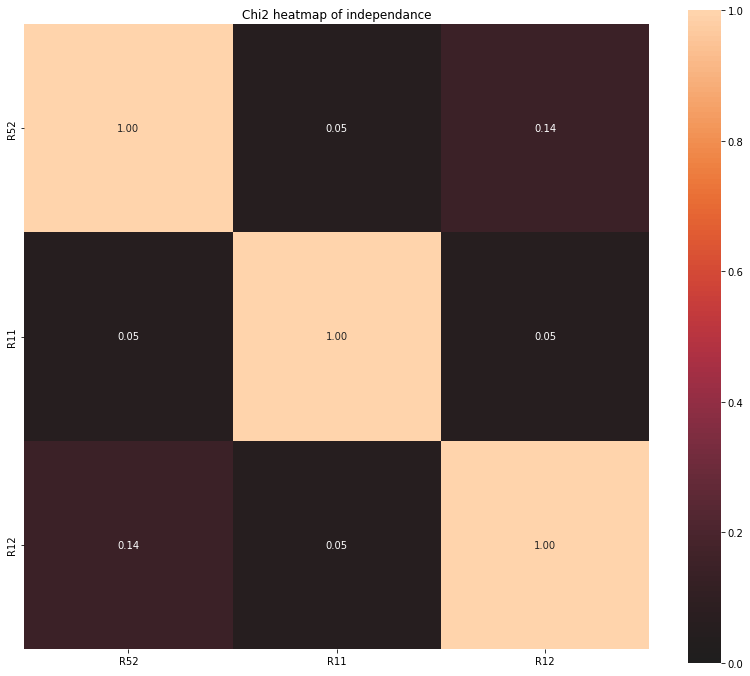

In [42]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 11
while i <= 12:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _17_ a _18_

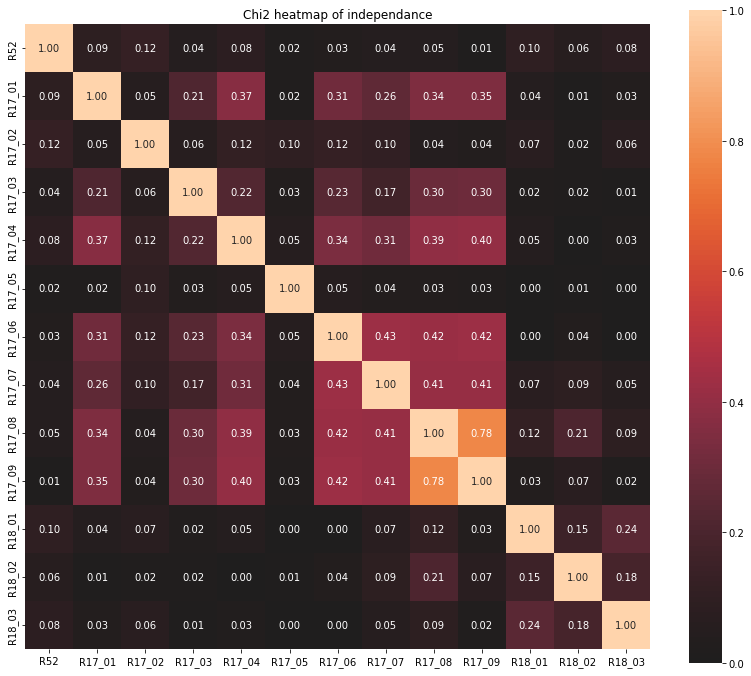

In [43]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 17
while i <= 18:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _19_

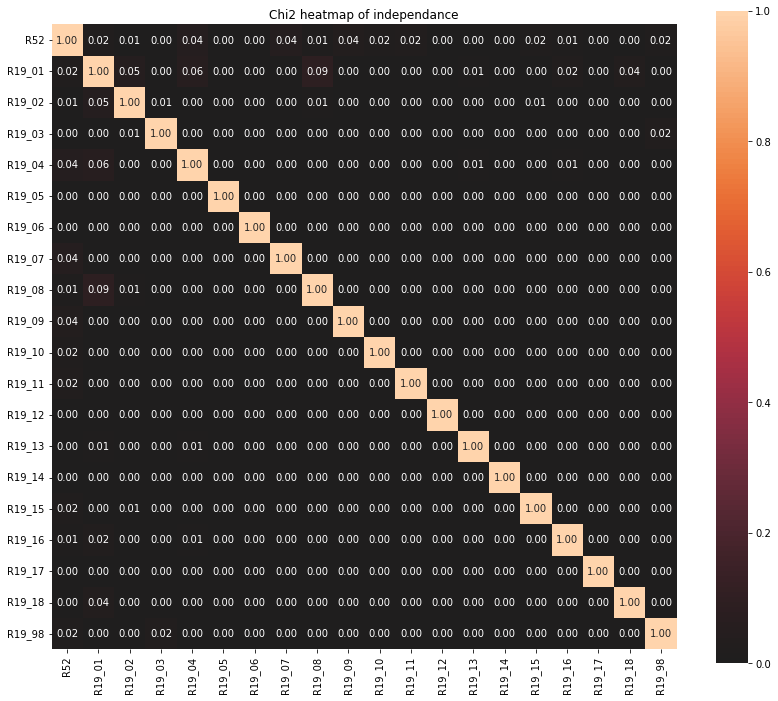

In [44]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 19
while i <= 19:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _21_ a _27_

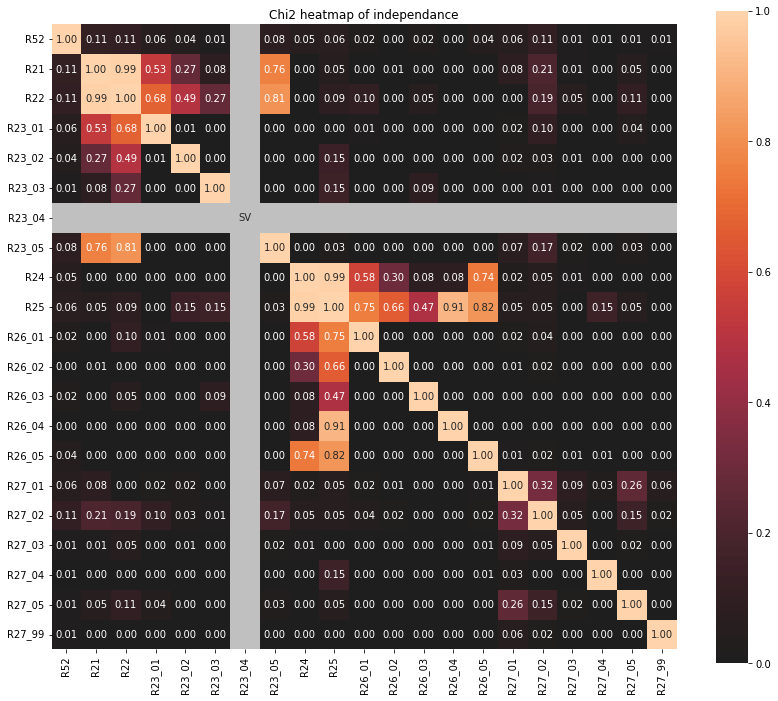

In [45]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 21
while i <= 27:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _28_ a _30_

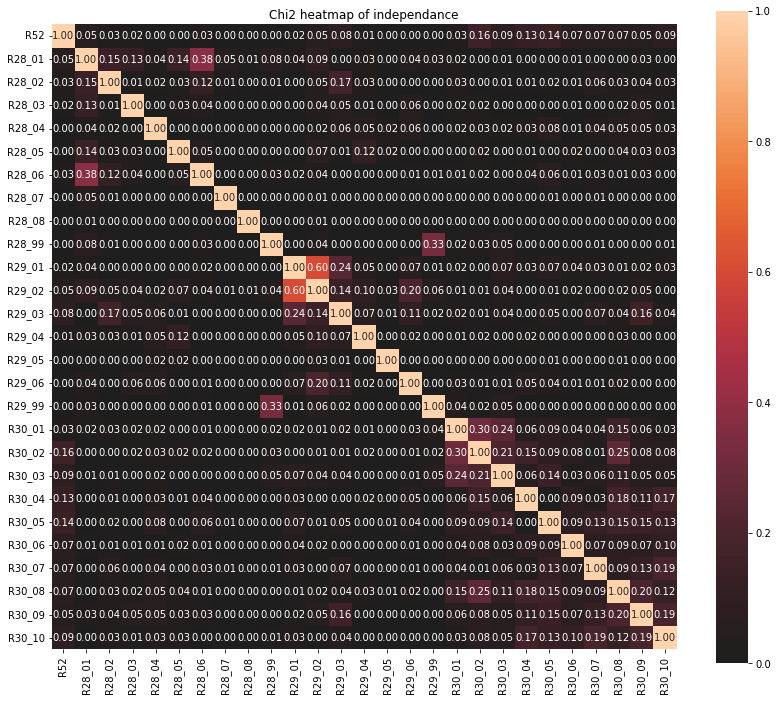

In [46]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 28
while i <= 30:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _31_ a _32_

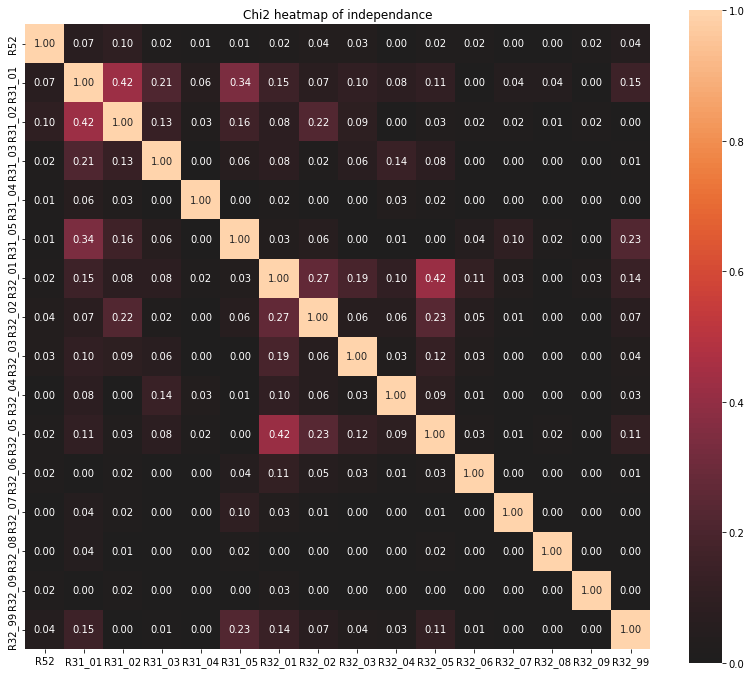

In [47]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 31
while i <= 32:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _33_ a _40_

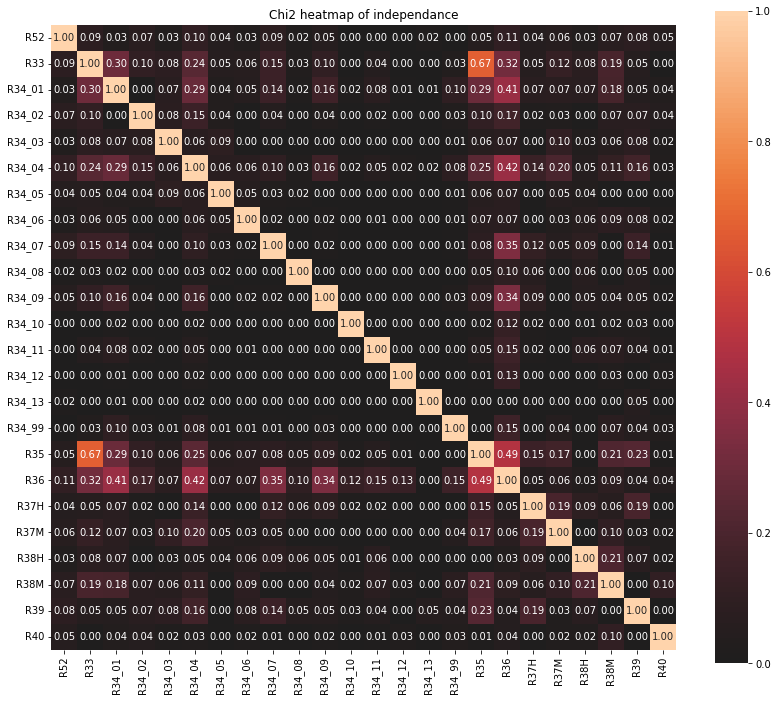

In [48]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 33
while i <= 40:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _41_ 

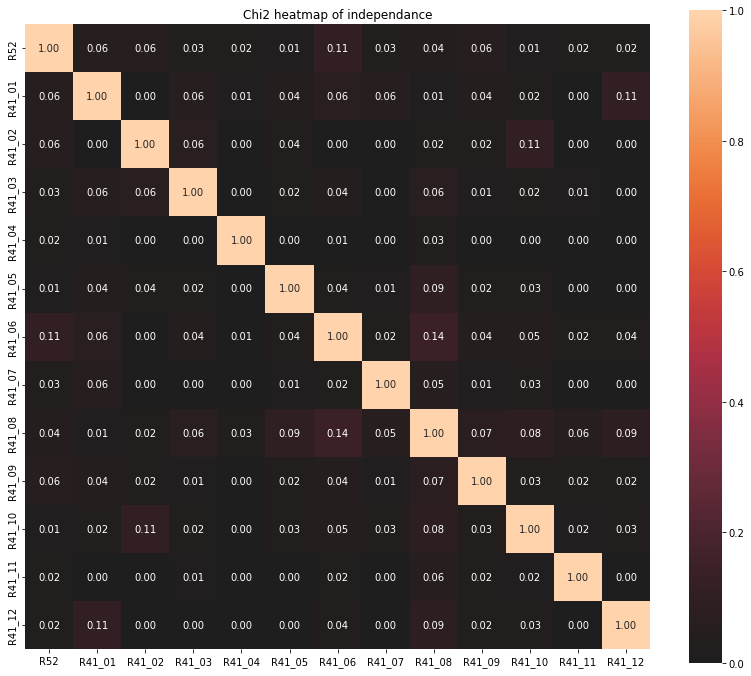

In [49]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 41
while i <= 41:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _42_ a _44_

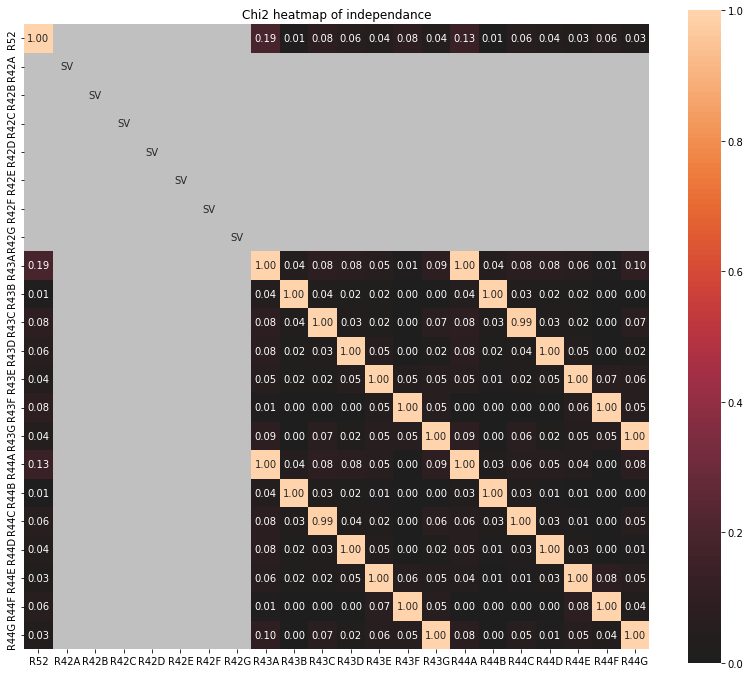

In [50]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 42
while i <= 44:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _45_

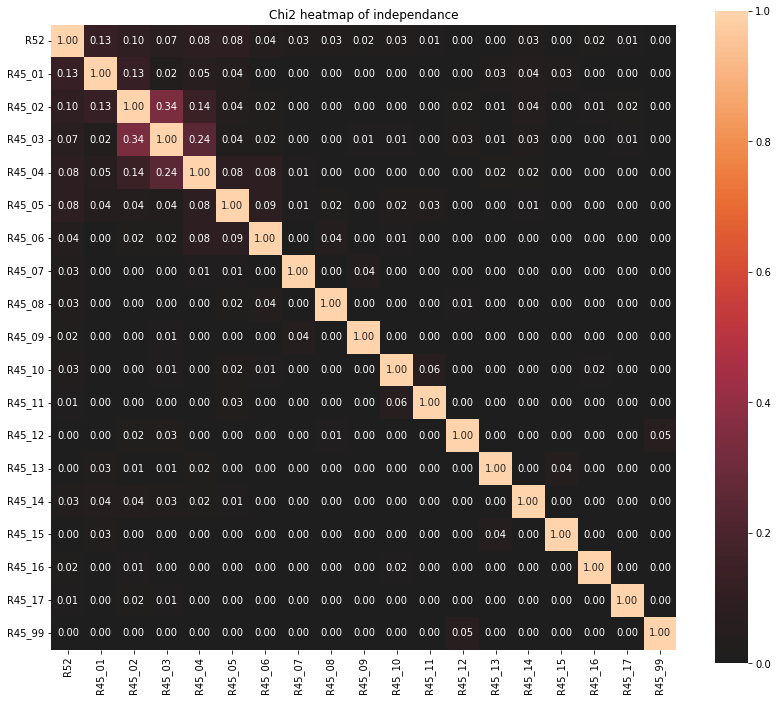

In [51]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 45
while i <= 45:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _46_ a _48_

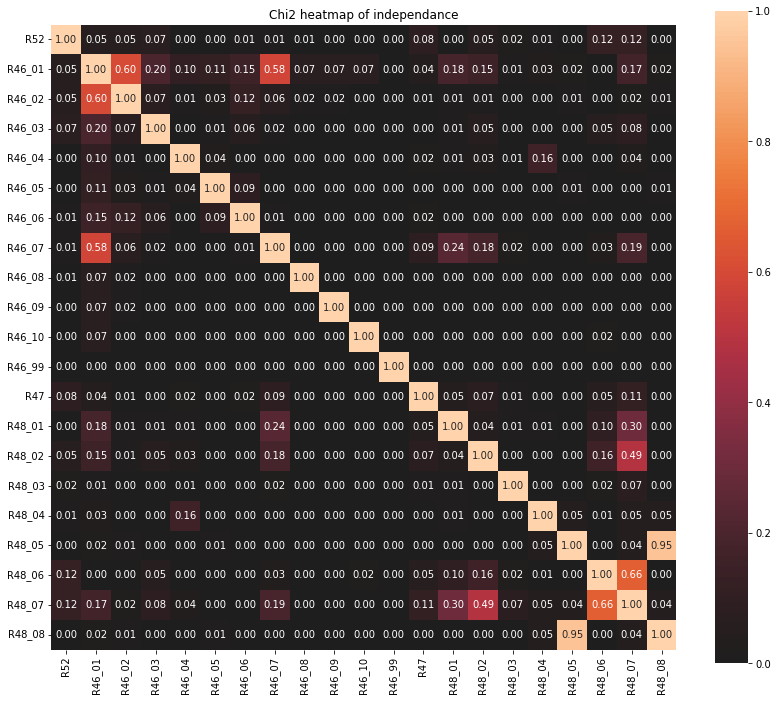

In [52]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 46
while i <= 48:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _49_

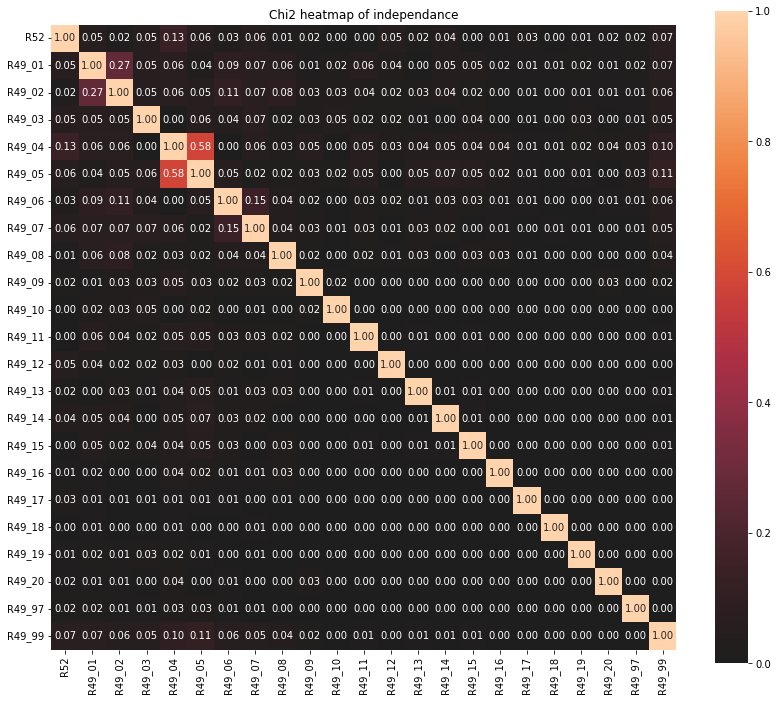

In [53]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 49
while i <= 49:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _50_ a _51_

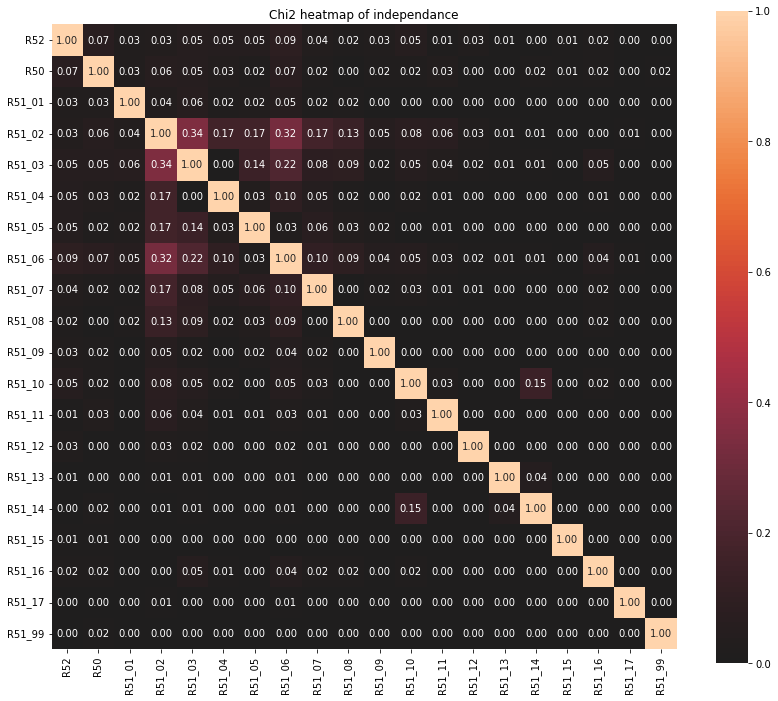

In [54]:
bloco_buscado = []
aux = ''
i = 50
while i <= 51:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _54_ a _59_

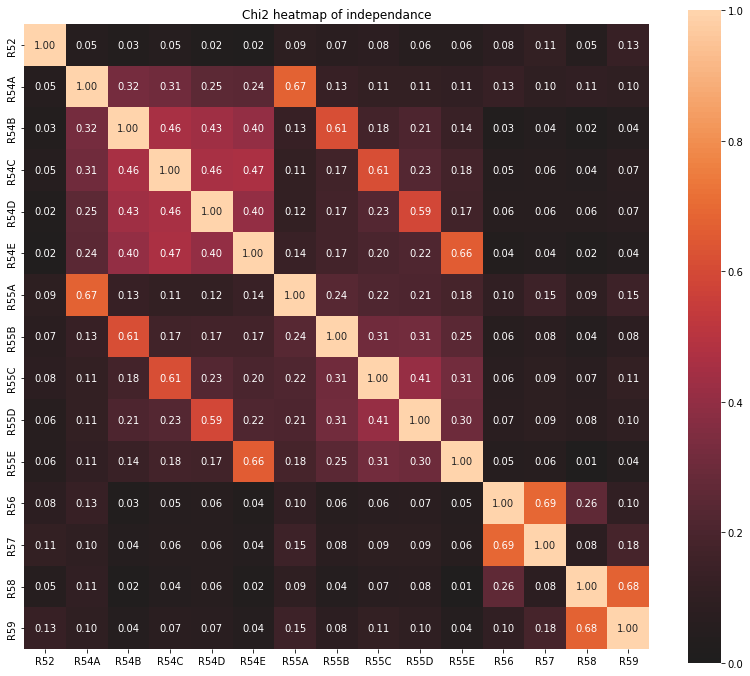

In [55]:
bloco_buscado = []
aux = ''
i = 54
while i <= 59:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _60_ a _66_

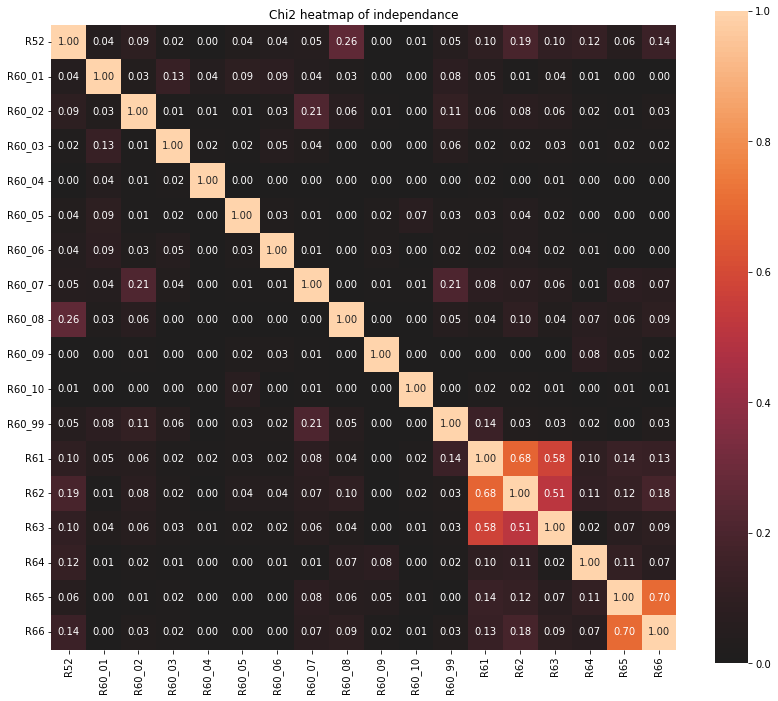

In [56]:
bloco_buscado = []
aux = ''
i = 60
while i <= 66:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _67_ a _68_

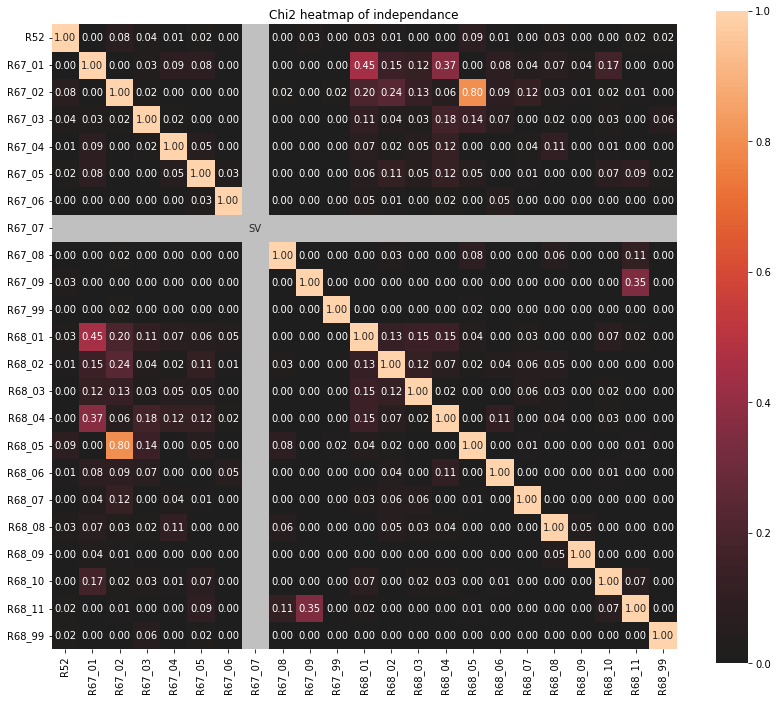

In [57]:
bloco_buscado = []
aux = ''
i = 67
while i <= 68:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _69_ a _71_

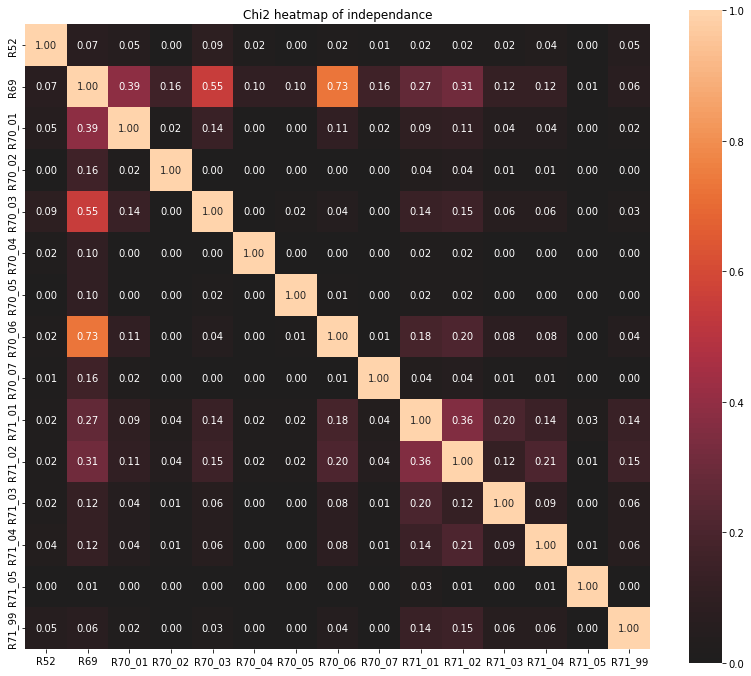

In [58]:
bloco_buscado = []
aux = ''
i = 69
while i <= 71:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _72_ a _73_

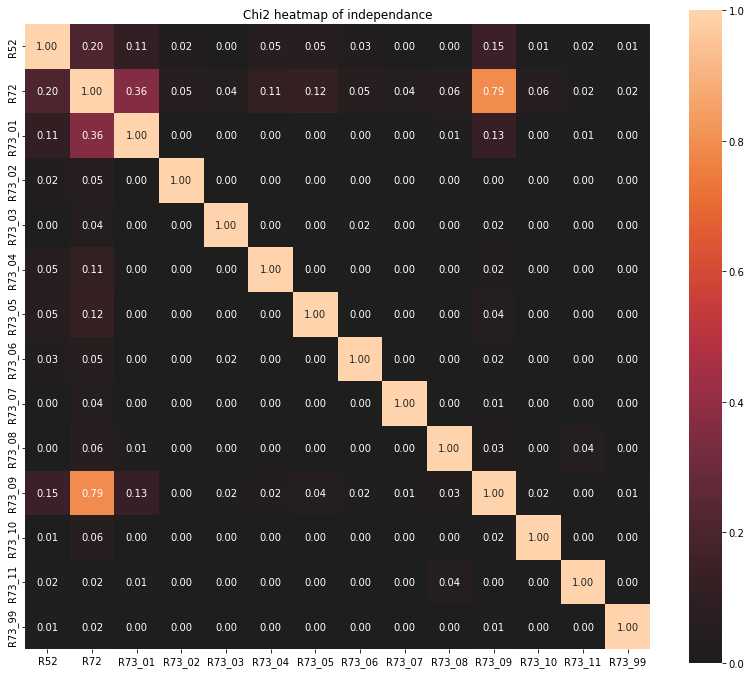

In [59]:
bloco_buscado = []
aux = ''
i = 72
while i <= 73:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _74_ a _75_

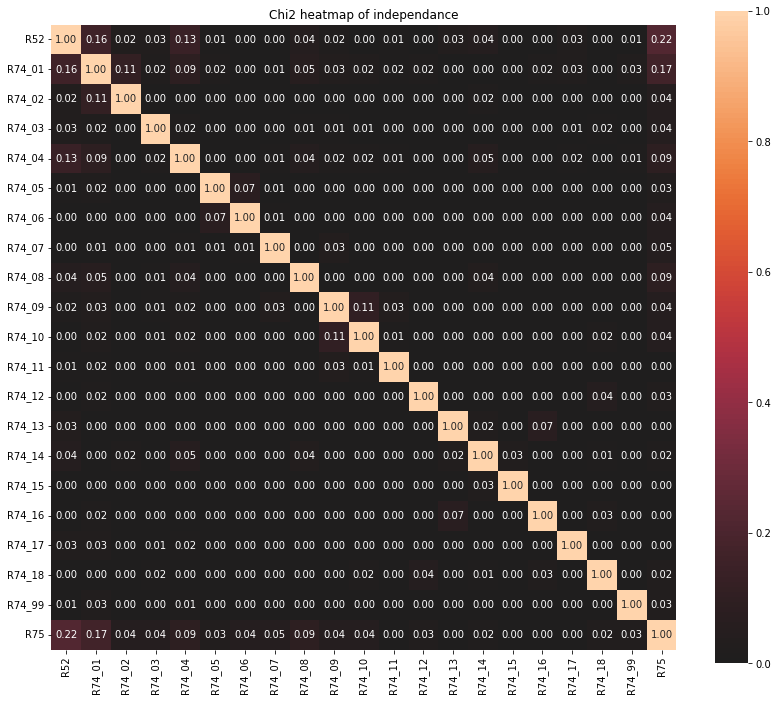

In [60]:
bloco_buscado = []
aux = ''
i = 74
while i <= 75:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _76_ a _78_

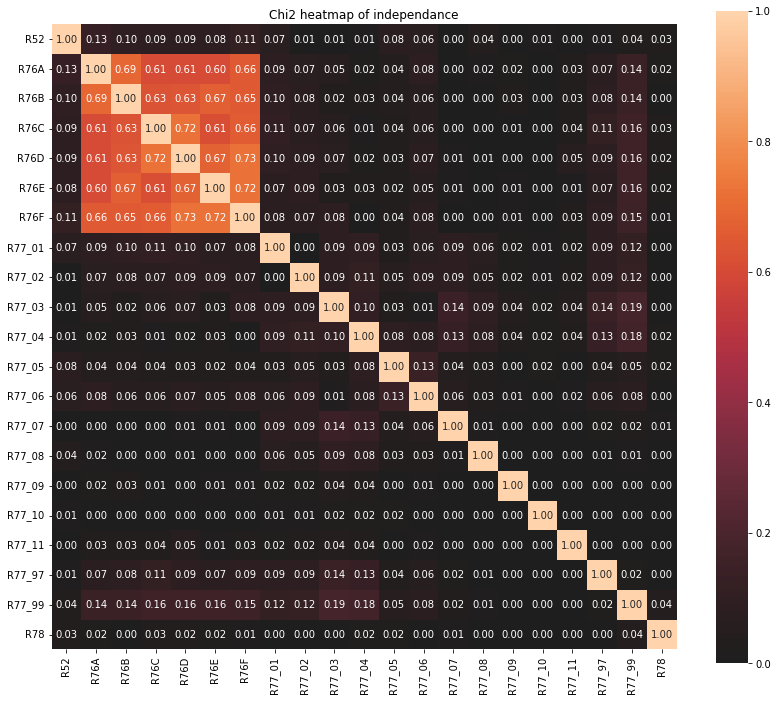

In [61]:
bloco_buscado = []
aux = ''
i = 76
while i <= 78:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _79_ a _82_

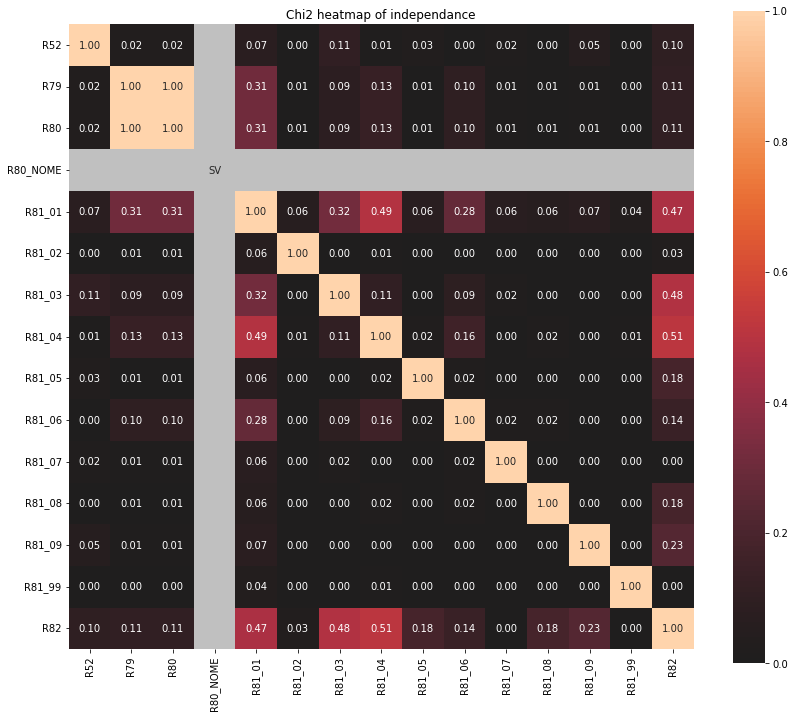

In [62]:
bloco_buscado = []
aux = ''
i = 79
while i <= 82:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _83_ a _86_

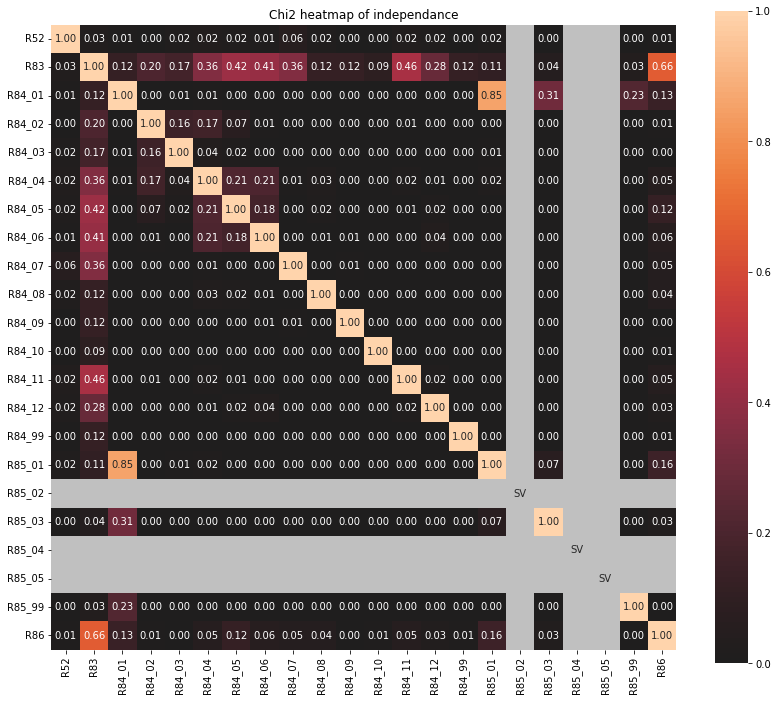

In [63]:
bloco_buscado = []
aux = ''
i = 83
while i <= 86:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _87_ a _90_

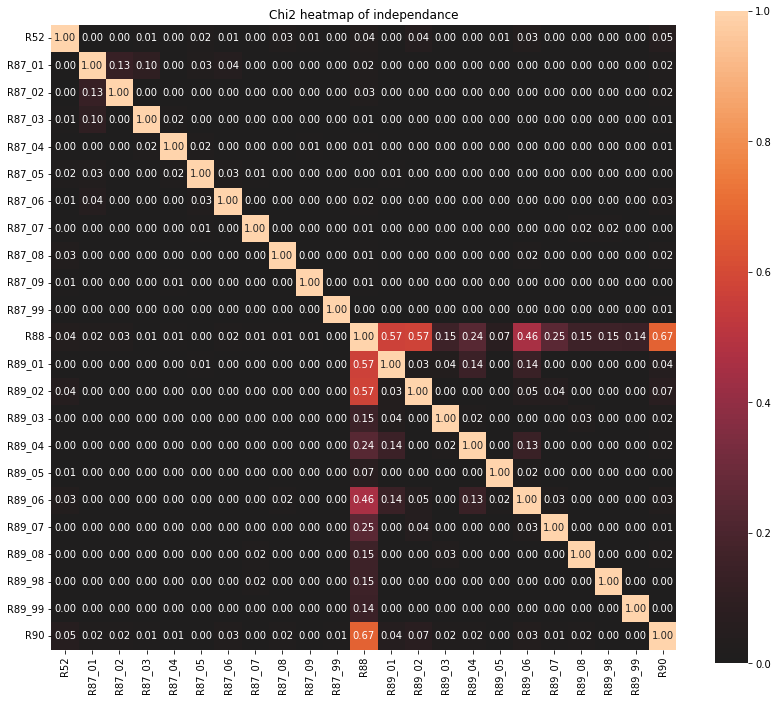

In [64]:
bloco_buscado = []
aux = ''
i = 87
while i <= 90:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _91_ a _94_

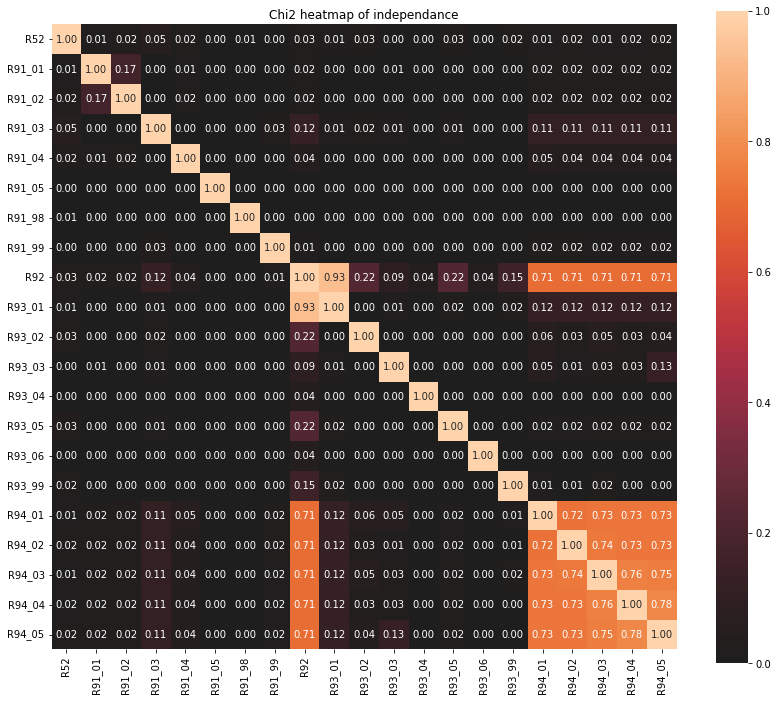

In [65]:
bloco_buscado = []
aux = ''
i = 91
while i <= 94:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

**Importância de Features**

Note que após a aplicação dos Testes do Chi Quadrado em nosso dataframe, em geral, se você observar bem, poucas conclusões conseguimos tirar haja vista que as correlações se permanecem baixas, dificultando a possibilidade de estabelecer uma regra a seguir em quesito de filtrar as features. 

No entanto, não é o fim. Nosso próximo passo será utilizar brevemente o modelo de Árvore de Decisão (Decision Tree), não para treiná-lo já (até porque nem concluímos nossa análise exploratória e muito menos dividimos os conjuntos de treino e teste), mas com o intuito de usufruir de uma certa funcionalidade que o classificador possui.

- `feature_importances_`: ela retorna uma medida de importância relativa de cada feature usado no treinamento do modelo. Essa pontuação indica o quanto cada recurso é relevante para fazer previsões precisas. 

Logo, uma vez que usamos o dataset das features qualitativas, conseguimos obter então quais as features mais relevantes em relação à previsão do nosso _Target_, o que facilita a seleção de features. Portanto, podemos priorizar as 10 features mais importantes do nosso Dataframe, nos dando a capacidade de ter insights ainda melhores e podendo ser capaz de melhorar o desempenho do nosso modelo. Vale lembrar que utilizaremos apenas em consideração as categóricas.

In [66]:
info_categoricas = info_categoricas.astype('category')

# Removeremos a coluna ID_DOM, pois não é relevante, mas o modelo trata como se fosse. Vamos remover também algumas colunas 
# que carregam vieses em relação ao nosso target (endividamento). Vale lembrar que para identificá-las, estamos aplicando o modelo em mais de uma vez e filtrando.
cat_sem_vies = info_categoricas.drop(['R53_01', 'R53_02', 'R53_03', 'R53_04', 'R53_05', 'R53_06', 'R53_07', 'R53_08', 'R53_09', 'R60_08', 'R75'], axis=1)

In [67]:
from sklearn.tree import DecisionTreeClassifier # Importando o modelo de classificação

X = cat_sem_vies.drop("R52", axis=1)
Y = cat_sem_vies['R52']
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,Y)

DecisionTreeClassifier(random_state=0)

In [68]:
features_imp = pd.DataFrame({"feature":X.columns,"importance":clf.feature_importances_})
features_imp.sort_values("importance", ascending=False).head(10)

,feature,importance
258,R62,0.037919
119,R36,0.022444
299,R72,0.020007
12,R12,0.019558
331,R76A,0.014080
14,R17_02,0.013547
8,R09_01,0.012913
5,R07_01,0.012690
260,R64,0.012077
214,R50,0.011995


Geralmente, o método feature_importances_ retorna um array em que cada elemento corresponde a um recurso e representa a importância desse recurso. As pontuações são normalizadas, ou seja, somam 1. Isso permite que você compare as importâncias relativas entre os recursos. No entanto, analisar dessa forma não ajudará muito, mas decidimos apenas mostrar para entender um pouco mais.

In [69]:
clf.feature_importances_

array([0.00000000e+00, 7.80361341e-04, 9.96427335e-03, 6.43105673e-04,
       0.00000000e+00, 1.26899279e-02, 0.00000000e+00, 0.00000000e+00,
       1.29133161e-02, 0.00000000e+00, 0.00000000e+00, 6.45435723e-03,
       1.95581060e-02, 6.51387540e-03, 1.35468161e-02, 5.98041553e-03,
       4.98908451e-03, 1.11643932e-02, 4.46412701e-03, 3.90218556e-03,
       1.61490406e-03, 1.56681331e-04, 6.03574026e-04, 0.00000000e+00,
       1.12372033e-03, 2.37540053e-04, 7.67693934e-04, 1.34042027e-03,
       5.71906173e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.80930083e-04, 0.00000000e+00, 3.40521312e-04,
       3.37116099e-04, 0.00000000e+00, 0.00000000e+00, 3.47818198e-04,
       7.82093239e-04, 0.00000000e+00, 1.87286722e-04, 1.07702868e-03,
       3.23861134e-03, 2.83739574e-03, 3.27089638e-04, 0.00000000e+00,
       0.00000000e+00, 4.45934406e-03, 2.49715629e-04, 9.59420825e-04,
       3.63222733e-04, 2.84559670e-04, 0.00000000e+00, 9.31289226e-04,
      

Por fim, vamos separar então as 10 features mais importantes segundo o modelo.

In [70]:
more_relevant_10 = ['R62', 'R36', 'R72', 'R12', 'R76A', 'R17_02', 'R09_01', 'R07_01', 'R64', 'R50'] # em ordem de relevancia
top_features = responsaveis_df.loc[:, more_relevant_10 + ['R52']]
top_features

,R62,R36,R72,R12,R76A,R17_02,R09_01,R07_01,R64,R50,R52
0,2,1,2,6,1,1,4,5,2,2,"Sim, ainda está"
1,2,8,1,3,1,1,4,4,2,3,"Sim, ainda está"
2,2,1,2,6,1,97,99,99,2,2,"Sim, mas não está mais"
3,2,1,1,1,1,97,4,1,2,2,"Sim, mas não está mais"
4,2,99,2,1,1,1,99,99,2,2,"Sim, mas não está mais"
...,...,...,...,...,...,...,...,...,...,...,...
8822,2,2,2,4,1,2,99,99,2,1,"Sim, mas não está mais"
8823,2,1,2,3,1,1,99,99,2,3,"Sim, ainda está"
8824,2,1,2,1,1,97,99,99,2,2,"Sim, mas não está mais"
8825,2,1,2,1,2,1,5,2,2,1,"Sim, mas não está mais"


## 3. Aplicação do modelo

**Separando conjunto de treino e teste**

Note que para avaliarmos o quão a nossa seleção é relevante para a classificação com base em nossa pergunta, será necessário separar conjuntos de treinos e testes tanto do dataframe `top_features` quanto do `responsaveis_df` e comparar a eficácia de previsão de ambos. 

Separando os conjuntos de treino e teste de `top_features`:

In [71]:
# Dividindo o que é feature e o que é target
X_top = top_features.drop('R52', axis=1)
Y_top = top_features['R52']

# Vamos agora dividir os conjuntos de treinamento e teste
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_top, Y_top, test_size=0.2, random_state=42)

Separando os conjuntos de treino e teste de `responsaveis_df`:

In [72]:
# Dividindo o que é feature e o que é target
X_resp = responsaveis_df.drop('R52', axis=1)
Y_resp = responsaveis_df['R52']

# Vamos agora dividir os conjuntos de treinamento e teste
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_resp, Y_resp, test_size=0.2, random_state=42)

Agora possuímos quatro conjuntos separados para cada um dos dataframes: 

- **Xi_train**: features de treinamento
- **Xi_test**: features de teste
- **Yi_train**: target de treinamento
- **Yi_test**: target de teste

**Treinando o modelo de Árvore de Decisão**

Como o `DecisionTree` já foi importado, não será necessária a importação do modelo novamente. Enfim, agora, somos capazes de treinar ambos os dataframes com o método `fit` do mesmo.

Treinando o conjunto de `top_features`:

In [73]:
top_clf = DecisionTreeClassifier(random_state=0)
top_clf.fit(X1_train, Y1_train)

DecisionTreeClassifier(random_state=0)

In [74]:
Y1_predict = pd.Series(top_clf.predict(X1_test))
Y1_predict.to_frame()

,0
0,"Sim, ainda está"
1,"Sim, mas não está mais"
2,"Sim, mas não está mais"
3,"Sim, ainda está"
4,"Sim, ainda está"
...,...
1737,Não
1738,"Sim, ainda está"
1739,"Sim, mas não está mais"
1740,"Sim, mas não está mais"


In [75]:
Y1_test.to_frame()

,R52
1251,"Sim, ainda está"
2937,"Sim, mas não está mais"
6688,"Sim, mas não está mais"
2689,"Sim, mas não está mais"
1766,Não
...,...
3047,"Sim, ainda está"
1834,"Sim, mas não está mais"
3182,"Sim, mas não está mais"
4367,"Sim, mas não está mais"


Para podermos comparar as previsões com os rótulos reais, vamos utilizar a função que calcula acurácia de previsão de um modelo, da biblioteca Skicit-Learn, `accuracy_score`.

In [76]:
from sklearn.metrics import accuracy_score
accuracy_top = accuracy_score(Y1_test, Y1_predict)

print(f'Acurácia: {accuracy_top}')

Acurácia: 0.491963260619977


Wow! 50% de acurácia. Obviamente não é um número muito bom, mas também não é um número ruim. Agora, antes de tentarmos aplicar métodos que nos tragam um melhor coeficiente de desemepenho, vamos comparar com os resultados que vão ser obtidos para o dataframe inteiro.

Treinando o conjunto `responsaveis_df`:

In [77]:
resp_clf = DecisionTreeClassifier(random_state=0)
resp_clf.fit(X2_train, Y2_train)

ValueError: could not convert string to float: 'Minas Gerais'